<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/Inclass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



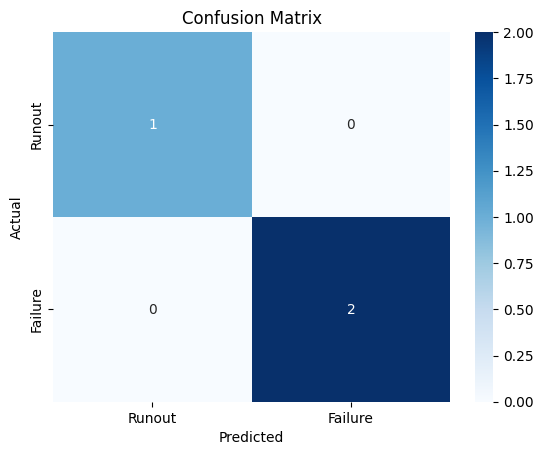

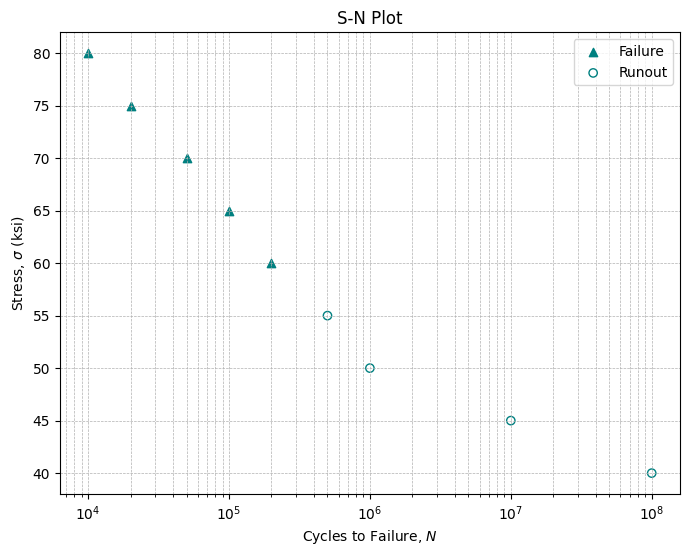

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# Sample dataset (manually digitized, replace these values with actual points)
data = {
    "cycles_to_failure": [1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6, 1e7, 1e8],
    "stress": [80, 75, 70, 65, 60, 55, 50, 45, 40],
    "label": ["failure", "failure", "failure", "failure", "failure", "runout", "runout", "runout", "runout"]
}

df = pd.DataFrame(data)

# Encode labels (failure = 1, runout = 0)
df["label_encoded"] = df["label"].apply(lambda x: 1 if x == "failure" else 0)

# Features (X) and labels (y)
X = df[["cycles_to_failure", "stress"]].values
y = df["label_encoded"].values

# Log-scale the "cycles_to_failure" for better numerical stability
X[:, 0] = np.log10(X[:, 0])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Runout", "Failure"], yticklabels=["Runout", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

failure_points = df[df["label"] == "failure"]
runout_points = df[df["label"] == "runout"]

plt.figure(figsize=(8, 6))

# Plot failure points
plt.scatter(failure_points["cycles_to_failure"], failure_points["stress"], marker="^", color="teal", label="Failure")
# Plot runout points
plt.scatter(runout_points["cycles_to_failure"], runout_points["stress"], marker="o", facecolors='none', edgecolors="teal", label="Runout")

# Customize plot
plt.xscale("log")
plt.xlabel("Cycles to Failure, $N$")
plt.ylabel("Stress, $\sigma$ (ksi)")
plt.title("S-N Plot")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()